In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataaset

In [51]:
df_train = pd.read_csv("dataset/train.csv")
df_test = pd.read_csv("dataset/test.csv")

# Data Processing

In [52]:
df_train

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
749995,749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0


In [53]:
df_train.isna().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [56]:
df_train['gender_encoded'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_train = df_train.drop(columns=['Sex', 'id'])

In [57]:
df_test['gender_encoded'] = df_test['Sex'].map({'female': 0, 'male': 1})
df_test = df_test.drop(columns=['Sex', 'id'])

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             750000 non-null  int64  
 1   Height          750000 non-null  float64
 2   Weight          750000 non-null  float64
 3   Duration        750000 non-null  float64
 4   Heart_Rate      750000 non-null  float64
 5   Body_Temp       750000 non-null  float64
 6   Calories        750000 non-null  float64
 7   gender_encoded  750000 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 45.8 MB


In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             250000 non-null  int64  
 1   Height          250000 non-null  float64
 2   Weight          250000 non-null  float64
 3   Duration        250000 non-null  float64
 4   Heart_Rate      250000 non-null  float64
 5   Body_Temp       250000 non-null  float64
 6   gender_encoded  250000 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 13.4 MB


## Exploratory Data Analysis (EDA)

In [60]:
correlation_matrix = df_train.corr()

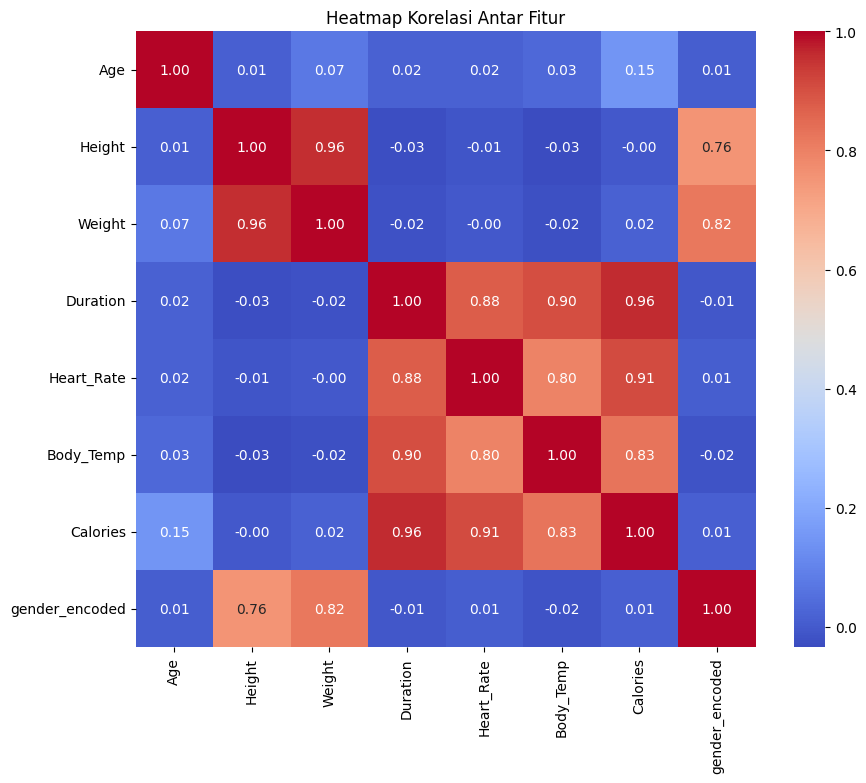

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(
  correlation_matrix,
  annot=True,
  cmap='coolwarm',
  fmt='.2f'
)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

# Training Model

In [94]:
from sklearn.preprocessing import StandardScaler

X_train = df_train.drop('Calories', axis=1)
y_train = df_train['Calories']

In [95]:
X_test = df_test

In [96]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [101]:
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers

## Arsitecture Model

In [102]:
input_features = X_train_scaled.shape[1]

In [106]:
model = models.Sequential([
    # Lapisan Input dan Lapisan Tersembunyi Pertama
    layers.Dense(64, activation='relu', input_shape=[input_features]),
    # Lapisan Tersembunyi Kedua
    layers.Dense(64, activation='relu'),
    # Lapisan Tersembunyi Ketiga
    layers.Dense(32, activation='relu'),
    # Lapisan Output untuk Regresi (1 neuron, tanpa aktivasi)
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

print("--- Arsitektur Model ---")
model.summary()
print("\n")

--- Arsitektur Model ---


d:\projects\python\kecerdasan-buatan\calories\venv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,785 (26.50 KB)

 Trainable params: 6,785 (26.50 KB)

 Non-trainable params: 0 (0.00 B)

## Training Model

In [107]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)
print("--- Pelatihan Model Selesai ---\n")

Epoch 1/15
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - loss: 56.1334 - mean_absolute_error: 2.9254 - val_loss: 13.3702 - val_mean_absolute_error: 2.2626
Epoch 2/15
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - loss: 14.6189 - mean_absolute_error: 2.3328 - val_loss: 13.6991 - val_mean_absolute_error: 2.2864
Epoch 3/15
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - loss: 14.4143 - mean_absolute_error: 2.3116 - val_loss: 13.1642 - val_mean_absolute_error: 2.2117
Epoch 4/15
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - loss: 14.2721 - mean_absolute_error: 2.2968 - val_loss: 13.9985 - val_mean_absolute_error: 2.3386
Epoch 5/15
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 14.1211 - mean_absolute_error: 2.2832 - val_loss: 14.4126 - val_mean_absolute_error: 2.4063
Epoch 6/15
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - loss: 13.9810 - mean_absolute_error: 2.2723 - val_loss: 15.7500 - val_mean_absolute_error: 2.5237
Epoch 7/15
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step -

## VISUALISASI HASIL TRAINING (Tidak ada perubahan)

--- Membuat Grafik Hasil Pelatihan ---
Kolom yang tersedia di history: Index(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error',
       'epoch'],
      dtype='object')


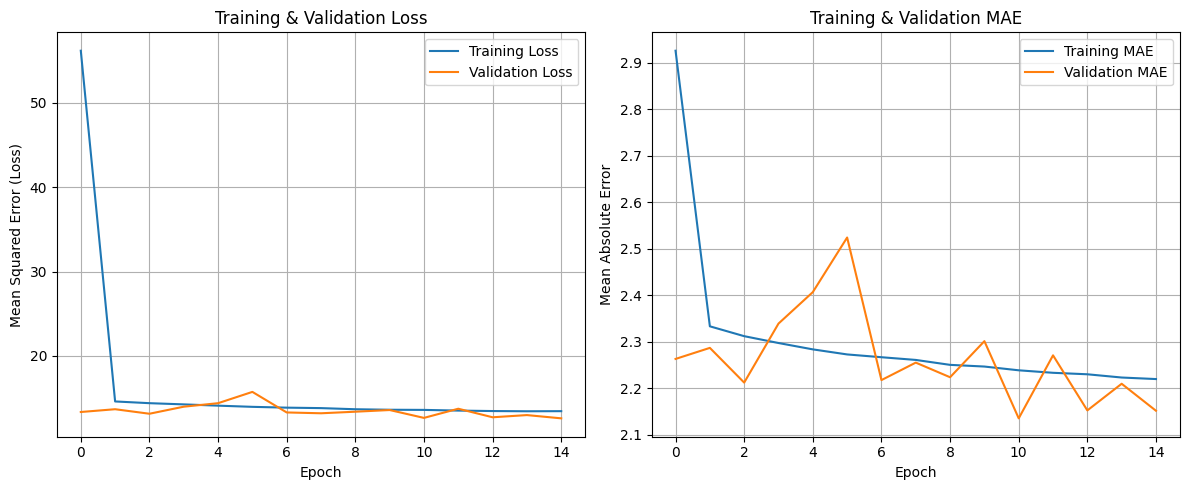

In [109]:
print("--- Membuat Grafik Hasil Pelatihan ---")
# Membuat DataFrame dari riwayat training untuk kemudahan plotting
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Tips: Anda bisa jalankan baris ini untuk melihat semua nama kolom yang tersedia
print("Kolom yang tersedia di history:", hist.columns)

# Membuat plot
plt.figure(figsize=(12, 5))

# Plot untuk Loss (ini sudah benar)
plt.subplot(1, 2, 1)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (Loss)')
plt.plot(hist['epoch'], hist['loss'], label='Training Loss')
plt.plot(hist['epoch'], hist['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.grid(True)
plt.legend()

# Plot untuk MAE (dengan nama kolom yang sudah diperbaiki)
plt.subplot(1, 2, 2)
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Training MAE')

# ===== PERBAIKAN DI BARIS INI =====
plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label='Validation MAE') 
# ==================================

plt.title('Training & Validation MAE')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [110]:
predictions = model.predict(X_test_scaled)

# Melihat 5 hasil prediksi pertama
print("Contoh 5 hasil prediksi kalori pada data test:")
print(predictions[:5].flatten())

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 7s 826us/step
Contoh 5 hasil prediksi kalori pada data test:
[ 27.927395 108.18822   87.00929  124.68646   75.81081 ]


In [111]:
from sklearn.metrics import r2_score

# Lakukan prediksi pada data training yang sudah di-scale
y_pred_train = model.predict(X_train_scaled)

# Bandingkan hasil prediksi (y_pred_train) dengan nilai asli (y_train)
r2 = r2_score(y_train, y_pred_train)

print(f"Nilai R-squared (R²) pada data training: {r2:.4f}")
print(f"Artinya, model ini mampu menjelaskan sekitar {r2:.2%} dari variasi data kalori.")

23438/23438 ━━━━━━━━━━━━━━━━━━━━ 16s 677us/step
Nilai R-squared (R²) pada data training: 0.9967
Artinya, model ini mampu menjelaskan sekitar 99.67% dari variasi data kalori.
